In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from flask import Flask, render_template, request

In [11]:
# Directories for dataset
data_dir ="P:/Anusha/Images" # Update this with the path to your dataset
train_dir = os.path.join(data_dir, "P:/Anusha/Images/Test_Set")
val_dir = os.path.join(data_dir, "P:/Anusha/Images/validation")
test_dir = os.path.join(data_dir, "P:/Anusha/Images/Test")

In [12]:
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)
print("Test Directory:", test_dir)


Train Directory: P:/Anusha/Images/Test_Set
Validation Directory: P:/Anusha/Images/validation
Test Directory: P:/Anusha/Images/Test


In [14]:
# Directories for dataset
train_dir = "P:/Anusha/Images/Test_Set"  # Full path to the training dataset
val_dir = "P:/Anusha/Images/validation"     # Full path to the validation dataset
test_dir = "P:/Anusha/Images/Test"  # Full path to the test dataset


In [15]:
# Image Data Generators
data_gen = ImageDataGenerator(rescale=1.0/255)
train_gen = data_gen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
val_gen = data_gen.flow_from_directory(
    val_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
test_gen = data_gen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=32, class_mode='binary', shuffle=False)


Found 4710 images belonging to 2 classes.
Found 4710 images belonging to 2 classes.
Found 4710 images belonging to 2 classes.


In [16]:
# CNN Model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()

p:\Applicaton\Anaconda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
print(f"Number of training samples: {train_gen.samples}")
print(f"Number of validation samples: {val_gen.samples}")


Number of training samples: 4710
Number of validation samples: 4710


In [18]:
# Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

p:\Applicaton\Anaconda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.6321 - loss: 0.7078 - val_accuracy: 0.9499 - val_loss: 0.2334
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 57s 385ms/step - accuracy: 0.9415 - loss: 0.1716 - val_accuracy: 0.9985 - val_loss: 0.0139
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 58s 391ms/step - accuracy: 0.9933 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 54s 363ms/step - accuracy: 0.9967 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 7.4436e-04
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 53s 359ms/step - accuracy: 0.9983 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 57s 386ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 5.4804e-04
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 53s 360ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 1.1135e-04
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 54s 368ms/step - accuracy: 0.9998

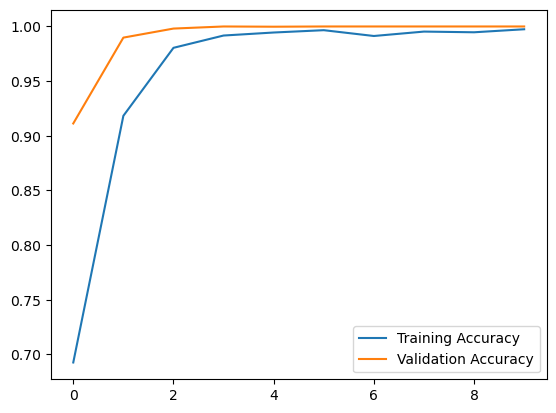

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [19]:
# Save the trained model
model.save("pancreatic_cancer_cnn.h5")
print("Model saved as pancreatic_cancer_cnn.h5")

Model saved as pancreatic_cancer_cnn.h5


In [20]:
# Evaluate Model
predictions = (model.predict(test_gen) > 0.5).astype(int)
y_true = test_gen.classes
cm = confusion_matrix(y_true, predictions)
accuracy = accuracy_score(y_true, predictions)

148/148 ━━━━━━━━━━━━━━━━━━━━ 66s 445ms/step


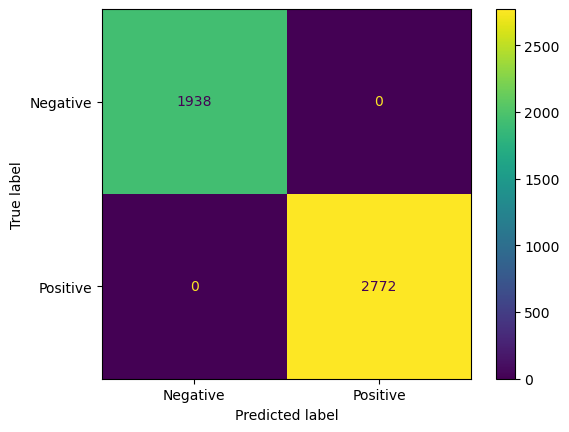

In [21]:
# Plot Confusion Matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"])
cmd.plot()
plt.savefig("confusion_matrix.png")

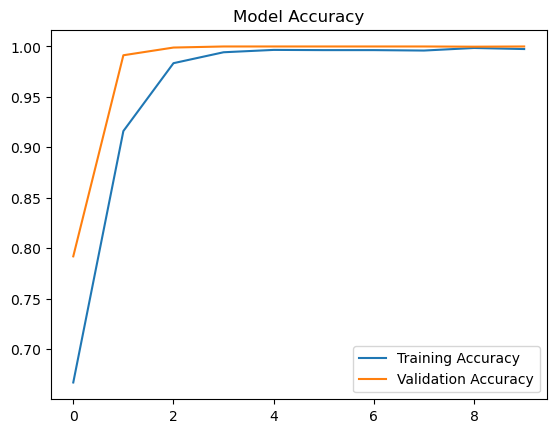

In [22]:
# Plot Accuracy and Loss
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.savefig("accuracy_plot.png")

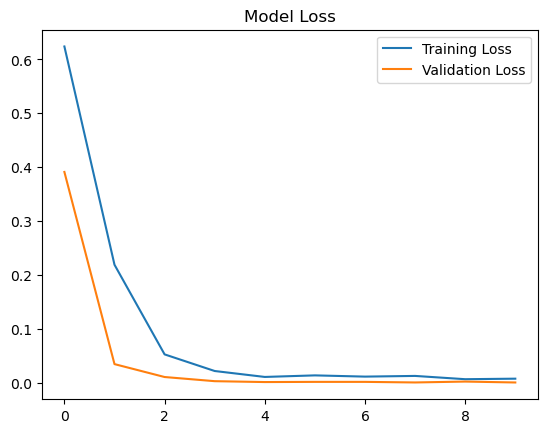

In [23]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.savefig("loss_plot.png")

In [2]:
import logging
logging.basicConfig(level=logging.DEBUG)
